# Deep Learning

**TODO**

Refs:
* Book with good math in deep learning: http://d2l.ai/index.html (Authors from Amazon; I personaly liked the section about MLE)

* THis is a good ref form Stanfort: https://stanford.edu/~shervine/teaching/cs-229/cheatsheet-machine-learning-tips-and-tricks

* See this discussion how to diagnose deep learning curves: https://machinelearningmastery.com/learning-curves-for-diagnosing-machine-learning-model-performance/


Refactor in sectiosn

1. DNN main concpets

    * neurons and archicteture
    * activations (Stanford cheat sheet pictures) 

1. Loss 

    * main losses, tf code and when to use
    * Add the discussion best constant prediction (regression) that depends of the loss (See coursera how to winn kaggle competition)


1. Optmizer and Gradient desctent 

    **Just the big picture. I will implement the algs in separate notebook**

    * Batch gradient descent 
        * update $\theta_j$ only after an epoch
        * The computation of the gradient $- \nabla J(\theta)$ is precise and always point to the direction of fast decrease of the loss function
        * Always utse all the data, so is memory hungry
        * can explore vectorization
    * stochastic gradient descent
        * update $\theta_j$ every single data $X^(i)$.
        * The computation of the gradient $- \nabla J(\theta)$ is not always good, sometimes point to the wrong direction. Guarantee that in the average the loss function is minimized
        * Faster  than Batch Gradient because update more times per epoch 
        * Do not use too much memorry
        * ca NOT explore vectorization
 
    * mini-btach (Review deeplearning.ai videos and notes ) 
        * update $\theta_j$ many times during an epoch. 
        * The computation of the gradient $- \nabla J(\theta)$ is good ok but not precise
        * Faster than all algorithms, because updates the arameters more often and also explore vectorization 
        * Do not use too much memorry
        * Explore vectorization
        * Relations with the others algs:
            * batch size = M: batch gradient descent
            * batch size = 1: stochastinc gradient descent 
        
https://www.youtube.com/watch?v=-_4Zi8fCZO4

Discusion about the algs . maybe better in ds_prgamatic notebook 
* implement only mini-batch gradient descent. The others you can set bacth size: m for Btach and 1 for Stochastic.

https://machinelearningmastery.com/gentle-introduction-mini-batch-gradient-descent-configure-batch-size/

https://towardsdatascience.com/batch-mini-batch-stochastic-gradient-descent-7a62ecba642a

https://www.geeksforgeeks.org/ml-mini-batch-gradient-descent-with-python/

https://github.com/bhattbhavesh91/gradient-descent-variants/blob/master/gradient-descent-variants-notebook.ipynb


Very good video about NN , back propagation and its intuition
At 11:27 also show implementations in pyhton good for references.
This code can be found in the book  http://neuralnetworksanddeeplearning.com/
https://www.youtube.com/watch?v=Ilg3gGewQ5U

book: http://neuralnetworksanddeeplearning.com/chap1.html#learning_with_gradient_descent

    * Momentum in some optmizer 

https://distill.pub/2017/momentum/

1. Learning curves diagnostics 
    
    * under fitting , right and overfitting
    * Add this Unknown fit - Validation error low, training error 'high' (shold review your data, wrongl labels in train, low diversity in validation, duplicated data in validation n etc)
    * train and loss in sync signal that you are goodand not overfitting
    * learning rate diagnostics big vs too small and ideal
    * Batch size trade off 
        * loss oscilating 

Add this discussion with real learning curves
https://machinelearningmastery.com/learning-curves-for-diagnosing-machine-learning-model-performance/

1. Recipe to train

    * General advices
    * Become one withh data (data descriptive and know your data)
    * Train strategy 
        1. Reduce bias error first 
        1. Then reduce variance 
        1. Squezze the juice 
    * Tunning

1. How to verify and check your code

    * overfit toy sample as small as 2 sample
    * verify initial loss
    * verify if you increase regularization the initial loss increase as well
    * shuffle labels and make sure now DNN is not learning (learning rate will be very slow compared to no shuffe labels)


refs:
* Coursera. deeplearning.ai
* https://blog.goodaudience.com/artificial-neural-networks-explained-436fcf36e75
* https://stanford.edu/~shervine/teaching/cs-229/cheatsheet-supervised-learning
* https://stanford.edu/~shervine/teaching/cs-229/cheatsheet-deep-learning


In [3]:
import os

import numpy as np

import tensorflow as tf
import tensorflow.keras  as K

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 

import IPython
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## DNN main concepts 


ANN can learning non-linear relationships 

<img src="images/non-linear_and_linear_decision_edge.png" width="400" align="left"/> 

### Architecture

#### Neuron

<img src="images/neuron_ANN.png" width="400" align="left"/> 


#### Activation func (allow ANN to learn no-linear relationships) 

Good activatiobn functions has non-linear shapes, easy to compute the function and the first derivative of the function

* **sigmoid function**: most common function. widely used on logiostic regression  
     * (range: 0.0 and 1.0)  
     * good for binnary classifiers (output layer) 

$$
g(z) = \frac{1}{1 + e^{-z} } \\
g'(z) = g(z) (1 - g(z)) \\
$$

**Proof:**

$
g'(x) = \frac{d}{dx}(1 + e^{-x})^{-1} \\
= \frac{(-1)}{(1 + e^{-x})^{2}}(-1)e^{-x}  \\
= g(x)\frac{e^{-x}}{(1 + e^{-x})} \\
= g(x)\frac{1+ e^{-x} - 1}{(1 + e^{-x})} \\
= g(x)(\frac{1+ e^{-x}}{(1 + e^{-x})} - \frac{1}{(1 + e^{-x})}) \\ 
g'(x) = g(x)(1-g(x))
$


<img src="images/sigmoid.png" width="200" align="left"/>   

#### tanh: hyperbolic tangent   

* range: -1.0 and 1.0  
* mean value is zero. This is good in optimization problems (remember why we should normalize the input features)  
*  good for hidden layers  

$$
g(z) = \frac{e^{z} - e^{-z}}{e^{z} + e^{-z} } \\
g'(z) = (1 - g(z)^2) \\
$$

**Proof:**

Remember hyperboic functions
$
cosh(x) \frac{e^x + e^{-x}}{2} \\
sinh(x) \frac{e^x - e^{-x}}{2} \\
cosh^2(x) - sinh^2(x) = 1 \\
\frac{d}{dx} cosh(x) = sinh(x) \\
\frac{d}{dx} sinh(x) = cosh(x) \\
$

So:

$
\frac{d}{dx} tanh(x) = \frac{d}{dx}\frac{sinh(x)}{cosh(x)}
$

Using $(u/v)'= \frac{u'v - v'u}{v^2}$

$
= \frac{sinh'(x)cosh(x) - cosh'(x)sinh(x)}{cosh^2(x)} \\
= \frac{cosh^2(x) - sinh^2(x)}{cosh^2(x)} \\
= \frac{1 - sinh^2(x)}{cosh^2(x)} \\
= 1- g^2(x) 
$

This is also true. But not useful for deep learning

$
\frac{d}{dx} tanh(x) = \frac{d}{dx}\frac{sinh(x)}{cosh(x)} \\
= \frac{cosh^2(x) - sinh^2(x)}{cosh^2(x)} \\
= \frac{1}{cosh^2(x)} = sech^2(x)
$

<img src="images/tanh.png" width="200" align="left"/>   

Another demonstration:

$
\frac{d}{dz} tanh(z) = \frac{d}{dz} \frac{e^{z} - e^{-z}}{e^{z} + e^{-z}} \\
$

Using $(u/v)'= \frac{u'v - v'u}{v^2}$

$
\frac{d}{dz} tanh(z) = \frac{(e^{z} + e^{-z})d/dz (e^{z} - e^{-z})+ (e^{z} - e^{-z}d/dz(e^{z} + e^{-z}))}
    {(e^{z} + e^{-z})^2} \\
= \frac{(e^{z} + e^{-z})(e^{z} + e^{-z})}{(e^{z} + e^{-z})^2)}-
\frac{(e^{z} - e^{-z})(e^{z} - e^{-z})}{(e^{z} + e^{-z})^2) }\\
= 1 - tanh^2(z)
$

#### ReLu: 

* range: 0  and inf   
* good for hidden layers
* very common. make train fast

$$
g(z) = max(0,z) \\
$$
$$
g'(z) =
\begin{cases} 
0 & \text{if  }  z < 0 \\
1 & \text{if  }  z > 0 \\
\end{cases} 
$$

<img src="images/relu.png" width="200" align="left"/>   

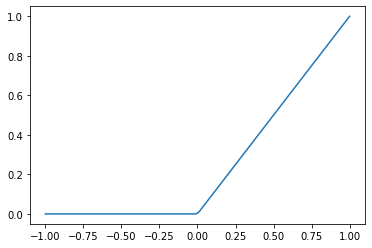

In [8]:
#3 See it in tensorflow
x = np.linspace(-1.0,1.0,100)

g = tf.nn.relu(x)
y = g.numpy()

plt.plot(x,y);

#### softmax: 

ref: https://cs231n.github.io/neural-networks-case-study/#grad

$$
\frac{e^{s_i}}{\sum_j^m e^{s_j}}
$$

where $m$ is the number of class

* range: vector where each element is between 0.0 and 1.0. There is nclass elements in the vector output
* softmax enhance the difference between the score
* good for multi-class classificatio (output layer)
* emphsaize the most likely class and return probabilities

#### layers  

<img src="images/layers.jpeg" width="400" align="left"/> 


### Loss

**cross-entropy loss** or **or log loss**: measure the performance of classifier where the outputs ranging between 0.0 and 1.0 

Cross-entropy loss increases as the predicted probability diverges from the actual label
Is the average of log likelihood over all the data

* Forward Propagation: computes the output given an input. (used in train and prediction phase)

* Back-propagation: computes the gradiens in order to train the model while the ANN is learning. Only used in train phase

#### Loss types

**TODO** 
1. Intuition and interpretation
2. When to use? It is better for?


```python

# Use the loss function (approx. 1 line)
cost = tf.nn.sigmoid_cross_entropy_with_logits(logits=z, labels=y)

```

$$- \frac{1}{m}  \sum_{i = 1}^m  \large ( \small y^{(i)} \log \sigma(z^{[2](i)}) + (1-y^{(i)})\log (1-\sigma(z^{[2](i)})\large )\small\tag{2}
$$


### Opitmizer

## How to train recipe

refs: 
* http://karpathy.github.io/2019/04/25/recipe/
* http://cs231n.github.io/neural-networks-3/#baby

1. General advices

    * fast n furious approach does not work
    * patient and pay attention in detail tends to work (correlates with success)
    * being defensive and obsessed about visualizations works
    * do baby steps and avoid to **introduce a lot of unverified complexity at once**
    * Build simple to complex
    * ReLu are good for hidden layers
        * Positive side learn faster than logistic and tanh due to the slope
        * The Negative side can make train stuck caused by dead neurons where the gradient becomes zero
    
1. Become one with data 

    * inspect data
    * try to see patterns (your brain is good at it)
    * always check for:
        * duplicated 
        * corrupted data
        * wrong labels (if not systemic may not hurt to much)
        * imbalance data
        * **outliers** caa cause gradient exploding
        
1. Set up pipeline for trainning and evaluations and test it

    * work with fixed seed 
    * simplify. does not add any regularization 
    *  **verify loss init**: Ex.  -log(1/n_classes) on a softmax at initialization. We can be derived for L2 regression, Huber losses, etc. **<= Andrej Karptahy Director of Tesla recommends that**  
        
        * violation indicates poor weight initialization or data is not normalized properly (double check this about normalization)
        * **Also check if you include regularization and dropout layers that increases inital loss** 
        
    * verify if you increase regularization the initial loss increase as well
    
    * **overfit one batch or small train sample dataset as little as 2**
    * **input independent** (shuffles labels) (the DNN should not learn. See the errors in test n val dataset)
    * visualize the input of DNN. y_hat = model(X). Vis X.  

1. Overfit (reduce bias error)

    * overfit
        * focus in **train loss** should be close to zero
        * if you try with many models  that you increased the complexity can suggest that you have a BUG
    * do not be a hero. start with the most related paper and copy and paste their simple architecture.
        * for images, ResNet-50 is a good start
        * for voice, xvectors
    * **Adam is safe with learning rate e3-4** !? but you can try different learning rate.
    * **Add complexity only one at time**. If you have multiple features. Suggest to add one by one and unsure you get a performance boost. Or you can try smaller image and the increase the image size 
    * **do not trust learning rate decay**. He always disable learning rate decays entirely. It is a personal advice. less problematic maybe

1. Regularize (reduce variance error)

    * **get more data** is by the far preferred way to regularize a model. It is **the only guarantee way to improve the model.**
    * **data augmentation**. The next best thing
    * **pretrain**. It is really rarely hurts to use a pre-trained network even if you have enough data.
        * xvectors
        * ResNet-50
    * **make smaller input dimensionality**. Remove features that can have spurious signal (Remove ciorrelated features)
    * **make smaller model**. Personal advise
        * He used to use FC layers after ImageNet, but these days he uses average pooling. eliminating a tons of parameters
    * **decrease batch size**. helps with regularization
    * **dropout**
    * **early stopping**
    
1. Tune

    * **random over grid search** Never use grid serach
    * **hyper-parameter optmization**
    
    
1. Squeeze the juice (It is not preference)

    * leave it training. One time he forgot one model running and get SOTA (state of the art) !?
    * ensembles
        * **TODO**: read this paper about hot to use ensemble to build one simple model: https://arxiv.org/abs/1503.02531
    

### Loss


#### Verify loss initialization


You initial loss and metric should be close to the one expected by random guess


* categorical cross entropy
    

For K classes and N samples  

$
L(\hat{y},y) = - \frac{1}{N} \sum_i^N  \sum_k^K \left [ y_i^k ln(\hat{y}_i^k) \right ]
$

where 

$
y_i^k = 1 \ \mbox{If sample i belongs to class k } \\
y_i^k = 0  \ \mbox{otherwise } \\
$

and $\hat{y}_i^k$ is the model probability prediction. For random guess you expect $\hat{y}_i^k = 1/K$ for all classes

So the expected initial loss is $ L_0(\hat{y},y) = -ln(1/K)$

>PS: You need a good sample size in order to see that

In [31]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

x_train.shape
x_test.shape

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


(60000, 28, 28)

(10000, 28, 28)

In [36]:
## Initila loss
sample_size = 5000

K = 10.00 # 10 digtis
expected_loss = - np.log(1.0/K)

res = model.evaluate(x_test[0:sample_size],  y_test[0:sample_size], verbose=2)
loss0 = res[0]
acc0 = res[1]


print('Initial loss: {0:.2f}; Expected loss: {1:.2f}'.format(loss0, expected_loss))


5000/1 - 0s - loss: 2.2788 - accuracy: 0.0640
Initial loss: 2.37; Expected loss: 2.30


## Learning rate diagnostics 

* refs:
    
    * https://towardsdatascience.com/understanding-learning-rates-and-how-it-improves-performance-in-deep-learning-d0d4059c1c10   (approach to detrmine best lr)
    * https://www.dataquest.io/blog/learning-curves-machine-learning/



### Bias and variance trade-off 

**Train error still to much high for the application**

<img src="images/biasvariance.png" height="250" width="400">

**variance error is related to gap between train and error** 

There is a minimum total error

<img src="images/irr_error.png" height="250" width="400">

### High bias


* left: high bias and low variance 
* right: high bias and high variance

What to do:

* Adding more training instances.
* Adding more features.
* Feature selection.
* Hyperparameter optimization
* train longer (deep learning)

<img src="images/add_data.png" height="400" width="600">

### Low bias high variance error


* left: low variance 
* right: high variance

What to do?

* Adding more training instances.  

* Increase the regularization for our current learning algorithm. This should decrease the variance and increase the bias.  

    * L1 or L2
    * dropout

* Reducing the numbers of features in the training data we currently use. The algorithm will still fit the training data very well, but due to the decreased number of features, it will build less complex models. This should increase the bias and decrease the variance. 


<img src="images/low_high_var.png" height="400" width="600">

### Learning rates 

Learning rate controls how much we are adjusting the weights of our network with respect the gradient of the loss function. 


<img src="images/learning_rate.png" height="400" width="600">

* Too small: **Less training time, lesser money spent on GPU cloud compute. :)**
* Too large: does not converge

<img src="images/learning_rate2.png" height="200" width="300">

### Is there a methodology to detrmine best learning rate?

In the article **Cyclical Learning Rates for Training Neural Networks""** Leslie N. Smith argued that you could estimate a good learning rate by training the model initially with a very low learning rate and increasing it (either linearly or exponentially) at each iteration.


1. change the learningrate at each minibatch (lienarlly or exponentially)
1. plot the learning rate (log) against loss; (choose the one close to the minumum)


**The python package fastai has function to do that** fastai is like keras for pytorch

### Tips n learning curve diagnostics

* https://stats.stackexchange.com/questions/345990/why-does-the-loss-accuracy-fluctuate-during-the-training-keras-lstm

* https://stats.stackexchange.com/questions/187335/validation-error-less-than-training-error 

**Summary**

* val loss or error smaller than train reasons
    * diff in train and val data distributions. 
        * Maybe train has harder case while validation has more easy cases.
        * data wrongly labeledin train datasets
        * dropouts (highe level) can cause that sometimes

* loss oscilation reasons
    1. batch_size is too small
    1. large neural network and small data  (**always compare #parmeters and #samples**)
    
    
* Batch size trade off (alsoe related to previous one)
    * too large make training slow
    * too small loss oscilation and takes more epoch to converge
    * large batch (**small number of mini batches** per epoch) size can make the DNN not learn

You can think of model evaluation in four different categories:

1. Underfitting – Validation and training error high

1. Overfitting – Validation error is high, training error low

1. Good fit – Validation error low, slightly higher than the training error

1. Unknown fit - Validation error low, training error 'high'


I say 'unknown' fit because the result is counter intuitive to how machine learning works. The essence of ML is to predict the unknown. If you are better at predicting the unknown than what you have 'learned', AFAIK the data between training and validation must be different in some way. 



>There are several reasons that can cause fluctuations in training loss over epochs. The main one though is the fact that almost all neural nets are trained with different forms of stochastic gradient decent. This is why batch_size parameter exists which determines how many samples you want to use to make one update to the model parameters. If you use all the samples for each update, you should see it decreasing and finally reaching a limit. Note that there are other reasons for the loss having some stochastic behavior.
>
>This explains why we see oscillations. But in your case, it is more that normal I would say. Looking at your code, I see two possible sources.
>
>Large network, small dataset: It seems you are training a relatively large network with 200K+ parameters with a very small number of samples, ~100. To put this into perspective, you want to learn 200K parameters or find a good local minimum in a 200K-D space using only 100 samples. Thus, you might end up just wandering around rather than locking down on a good local minima. (The wandering is also due to the second reason below).
>
>Very small batch_size. You use very small batch_size. So it's like you are trusting every small portion of the data points. Let's say within your data points, you have a mislabeled sample. This sample when combined with 2-3 even properly labeled samples, can result in an update which does not decrease the global loss, but increase it, or throw it away from a local minima. When the batch_size is larger, such effects would be reduced. Along with other reasons, it's good to have batch_size higher than some minimum. Having it too large would also make training go slow. Therefore, batch_size is treated as a hyperparameter.

### Gradient descent algorithms

refs: https://stats.stackexchange.com/questions/49528/batch-gradient-descent-versus-stochastic-gradient-descent

$
J(\theta)=\frac{1}{2}\sum_{i=1}^N(y_i−h_{\theta}(x_i)^2
$

$
\theta_j = \theta_j − \alpha \frac{\partial J(\theta)}{\partial \theta_j} 
$

The update is given by 

**REVIEW. THIS EQUATION IS NOT RIGHT**   
$
\alpha \nabla_{\theta} J(\theta) = \alpha \frac{\partial J(\theta)}{\partial \theta_j} \equiv \alpha \sum_{i=1}^N(y_i−h_{\theta}(x_i))x_i
$


where $\alpha$ is learning rate.

Comparison between Gradient, Sthocasting Gradient and mini-batch Gradient descent:

Let think how to estimate the gradient 
$
\nabla_{\theta}J(\theta|X) = f(\theta)
$


1. **Gradient descent**  


$
\nabla_{\theta}J(\theta|X) = f(\theta)
$    

$X$ is all data, Utilizes a lot of memory ans it is slow. 


    * Compute the gradient of the cost function using the entire dataset 
    * Update the weights.
    
    
    Pros n cons  
    
    * **Computational slow and utilizes a lot of memory**  
    * Guarantee that loss func always will reduce   
    

1. **Stochastic Gradient Descent**

$
\nabla_{\theta}J(\theta|X) = f(\theta)
$    

$X$ is one sample data $X ={x_i}$. Where $bs$ is batch size. Consume more memory than Sthocastica but less than Gradient. Easy pararlelization. Up to now is the faster and most popular implementation.

    * Compute gradient for each sample
    
    Pros n cons  
    
    * More sensible to noisy  
    * Faster than Gradient decsent  
    * Use less memmory   


1. **Mini batch Gradient**  

$
\nabla_{\theta}J(\theta|X) = f(\theta)
$    

$X$ is a subset of the $X = \{x_1,x_2,x_3, ..., x_{bs} \}$. Does not use too much memory and tends to be fast then Gradient Descent

    * Compute gradient for each mini batch (This is a estimation of the true Gradient )  

    Pros n Cons  
    
    * More robust to noisys data
    * Faster than all methods
    * Use less memory than Gradient but more than Stochastic


See this discusison for batches sizes:
* https://stats.stackexchange.com/questions/316464/how-does-batch-size-affect-convergence-of-sgd-and-why

>  the minibatch size gets larger the convergence of SGD actually gets harder/worse,

* Paper: https://research.fb.com/publications/accurate-large-minibatch-sgd-training-imagenet-in-1-hour/

>  large minibatches cause optimization difficulties, but when these are addressed the trained networks exhibit good generalization.  

* https://stats.stackexchange.com/questions/164876/tradeoff-batch-size-vs-number-of-iterations-to-train-a-neural-network/236393#236393 

> It has been observed in practice that when using a larger batch there is a significant degradation in the quality of the model, as measured by its ability to generalize. 
